# Task 2. Power Law\n",
    "2.1. Check that Zipf's Law holds <br>\n",
    "2.2. Assuming that the data is distributed according to the Power Law, find :\n",
    " * $\\alpha$ of the distribution\n",
    " * mean sample variance $\\sigma^2$\n",
    " \n",
    "2.3. Determine $x_{min}$ via Kolmogorov-Smirnov test"

# Import fuction

In [2]:
import pandas as pd
import urllib
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


import warnings; warnings.simplefilter('ignore')
G = nx.read_adjlist('facebook_combined.txt')

In [3]:
print('Number of vertices:', G.number_of_nodes())
print('Number of edges:', G.number_of_edges())
print('Number of connected components', nx.number_connected_components(G))

Number of vertices: 4039
Number of edges: 88234
Number of connected components 1


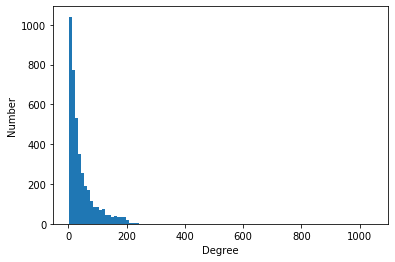

In [4]:
degrees_dictionary = dict(G.degree())
degrees = np.array(list(dict(G.degree()).values()))

# show node degrees
plt.xlabel('Degree')
plt.ylabel('Number')
plt.hist(degrees, 100)
plt.show()

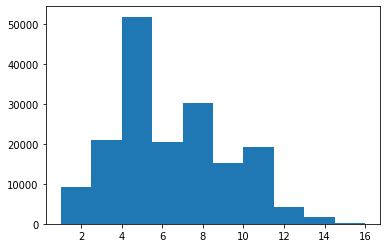

In [5]:
CC = sorted(nx.connected_components(G), key = len, reverse=True)

import random
cc0 = np.array(list(CC[0]))
subG = G.subgraph(np.random.choice(cc0, 1000))

shortest_paths = nx.shortest_path(subG)
lengths = []
for target, paths in shortest_paths.items():
    for k, value in paths.items():
        lengths.append(len(value))

plt.hist(lengths, 10)
plt.show()

In [6]:
print('Max degree:', max(degrees))
print('Mean degree', np.mean(degrees))

Max degree: 1045
Mean degree 43.69101262688784


# Zipf's Law

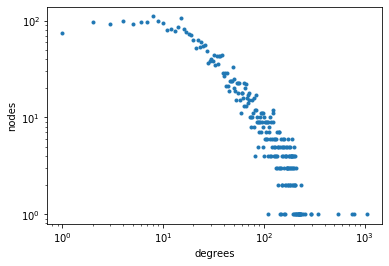

In [7]:
from collections import Counter
d = Counter(degrees)
plt.xlabel('degrees')
plt.ylabel('nodes')
plt.loglog(list(d.keys()), list(d.values()), '.', lw=2)
plt.show()

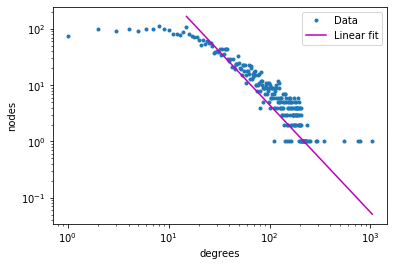

In [13]:
c = Counter(new_degrees)

C = (alpha - 1) * (x_min ** (alpha - 1))

def f(x):
    return C * (x ** (-alpha)) * n
x = np.arange(x_min, max(degrees), 1)

data, = plt.loglog(list(d.keys()), list(d.values()), '.', lw=2, label = 'Data')
fit,  = plt.loglog(x, f(x), 'm', label = 'Linear fit')
plt.xlabel('degrees')
plt.ylabel('nodes')
plt.legend(handles = [data, fit])
plt.show()

# Estimated alpha & sigma squared

In [11]:
def get_alpha(x_min):
    new_degrees = []
    for degree in degrees:
        if degree >= x_min:
            new_degrees.append(degree)

    n = len(new_degrees) + 0.0
    
    alpha = 0.0
    for degree in new_degrees:
        alpha = alpha + (np.log(degree / x_min))

    alpha = 1 + n / alpha
    
    return alpha

From the graph above one can obtain a rough value of the $x_{min}$, which is slightly more than 100.
To compute $\alpha$ and $\sigma^2$:

$\alpha = 1 + n (\sum ln( \frac{x_i}{x_{min}}))^{-1}$

$\sigma ^2 = \frac{\alpha - 1}{\sqrt{n}}$

In [12]:
x_min = 15.0
            
new_degrees = []
for degree in degrees:
    if degree >= x_min:
        new_degrees.append(degree)

n = len(new_degrees) + 0.0

alpha = 0.0
for degree in new_degrees:
    alpha = alpha + (np.log(degree / x_min))

alpha = 1 + n / alpha

alpha = get_alpha(x_min)
sigma = (alpha - 1) / np.sqrt(n)

print('Estimated alpha:', alpha)
print('and sigma squared:', sigma)

Estimated alpha: 1.9049947612440015
and sigma squared: 0.017257572966188045


# Kolmogorov-Smirnov test

Now it's time to estimate minimum degree using Kolmogorov-Smirnov test

In [14]:
# define functions to compute model and experimental CDFs

# to remind of one variable I calculated previously: d = Counter(degrees)
d_dict = dict(d)

def f_exp(x, x_min):
    result = 0.0
    N = 0.0
    for degree, nodes in d_dict.items():
        if degree >= x_min:
            N += nodes
            if degree <= x:
                result += nodes
    return result / N


def f_model(x, x_min, alpha):
    return 1 - (x / x_min) ** (1 - alpha)

In [15]:
# this is for plot D(x_min)
D_cords = dict()

def calculate_D(x_min):
    array = []
    alpha = get_alpha(x_min)
    for degree in d_dict.keys():
        if degree >= x_min:
            result = np.abs(f_model(degree, x_min, alpha) - f_exp(degree, x_min))
            array.append(result)
            D_cords[x_min] = result
    return max(array)

temp = dict()
for degree in d_dict.keys():
    if degree < 628:    
        temp[degree] = calculate_D(degree + 0.0)

In [16]:
real_x_min = min(temp,key=temp.get) + 0.0
print(real_x_min)

real_alpha = get_alpha(real_x_min)
real_C = (real_alpha - 1) * (real_x_min ** (real_alpha - 1))

46.0


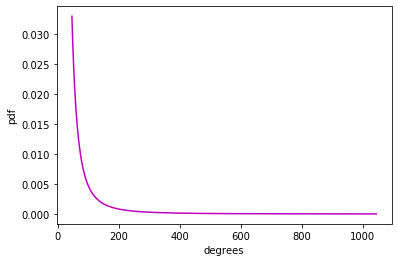

In [17]:
def pdf(x):
    return real_C * x ** (-real_alpha)
x = np.arange(real_x_min, max(degrees), 1)

plt.xlabel('degrees')
plt.ylabel('pdf')
plt.plot(x, pdf(x), 'm', label = 'PDF')
plt.show()

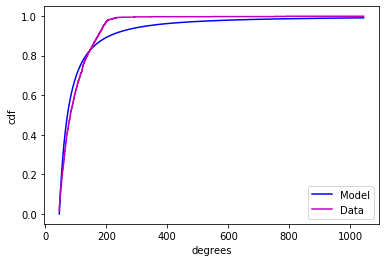

In [18]:
def cdf(x):
    return 1 - (x / real_x_min) ** (1 - real_alpha)

model, = plt.plot(x, cdf(x), 'b', label = 'Model')
y = []
for point in x:
    y.append(f_exp(point, real_x_min))
data,  = plt.step(x, y, 'm', label = 'Data')
plt.xlabel('degrees')
plt.ylabel('cdf')
plt.legend(handles = [model, data])
plt.show()